# **UTS DEEP LEARNING**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Problem Definition**

A major bank seeks to develop a predictive model to determine whether a personal loan application should be approved or rejected. The bank has provided customer data, including demographic information, account details, and transaction history, which will be used to build a binary classification model. The goal of the model is to classify each loan application as either "accepted" or "rejected" based on the likelihood of repayment. This will help the bank make more efficient and accurate lending decisions, reducing risk and improving customer service.

# **Data Understanding**

In [106]:
df = pd.read_csv('Bank_Loan_Granting.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


#### Dataset Description

- ID : customer ID
- Age : age of customer
- Experience : the number of years that the customer has experience
- Income : the customer's annual earnings
- ZIP Code : the postal code of the customer's location
- Family : the number of people in the customer's family
- CCAvg : the average monthly credit card spending
- Education : the level of customer's Education(undergraduate,graduate,professional)
- Mortgage : the Value of the customer's mortgage(the thing that the customer uses as a guarantee to the bank) 
- Securities Account : whether the customer has a security account or not(it's also known as an investment account)
- CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest on a fixed amount of money for a fixed period)
- Online : the customer uses the bank's online services or not
- CreditCard : the customer uses the bank's credit card or not
- Personal Loan : the customer is granted loans or not

Our **target variable** is `Personal Loan`

In [107]:
print("DataFrame shape:", df.shape)

DataFrame shape: (5000, 14)


The dataframe contains 5000 rows and 14 features.

In [108]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


From the information above, we can confirm that there are 2 datatypes in our dataset: 
- integer : 13 variables
- object/string: 1 variable

This will help for data preprocessing.

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.00,0.0,0.00,1.0


The dataset has different range between each columns. Ranging from -3 to 96651. This information is important when deciding whether it is needed to scale the data. 

In [111]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing values found.

# **a. Preprocessing**

Dataset yang diberikan memiliki beberapa problem, lakukan praproses data untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa saja yang kalian temukan dari data yang diberikan, berikan penjelasan mengenai pendekatan apa yang kalian gunakan dan kenapa memilih pendekatan yang dipilih?

#### **Drop columns**

Dropping columns with high cardinality like `ID`.

In [112]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


#### **Fix incorrect data types**

##### 1. `CCAvg`: from object to integer

`CCAvg` is the customer's average monthly credit card spending and is supposed to be numeric, but it is stored as an object data type. We need to convert `CCAvg` to numeric to continue our model. Also the values have `/` in it, I will replace it as `.` as a sign of decimal.

In [113]:
df['CCAvg'] = df['CCAvg'].str.replace("/" , '.').astype(np.float64)

In [114]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##### 2. Change `CCAvg` if `CreditCard` is 0

The `CreditCard` column indicates whether the customer uses the bank's credit card or not, with 0 meaning the customer does not have a credit card. Therefore, if `CreditCard` is 0, the `CCAvg` value (which represents the average monthly credit card spending) should logically be 0, as the bank cannot track any spending on a card that the customer does not possess.

In [115]:
df.loc[df['CreditCard'] == 0, 'CCAvg'] = 0
df[['CCAvg', 'CreditCard']].head()

,CCAvg,CreditCard
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,1.0,1


##### 3. Negative values in `Experience`

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,0.564428,1.282343,0.0,0.0,0.0,0.4,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


From the output of the `df.describe()` function, we can observe that the `Experience` column contains negative values, which is not possible since experience cannot be negative. To address this, we need to correct the negative values by converting them to their absolute values.

In [117]:
df['Experience'] = df['Experience'].abs()

In [118]:
df['Experience'].describe().T

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

##### 4. Change `Income`

In the dataset description, `Income` is recorded as the customer's annual income, while `CCAvg` represents the customer's average monthly credit card spending. To maintain consistency, I will convert `Income` to represent the customer's monthly income.

In [119]:
df['Income'] = df['Income']/12
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083333,91107,4,0.0,1,0,0,1,0,0,0
1,45,19,2.833333,90089,3,0.0,1,0,0,1,0,0,0
2,39,15,0.916667,94720,1,0.0,1,0,0,0,0,0,0
3,35,9,8.333333,94112,1,0.0,2,0,0,0,0,0,0
4,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1


##### 5. Change `ZIP Code` datatype

The `ZIP Code` represents the customer's place of residence and should not be stored as an integer because it is a categorical identifier, not a numeric value used for calculations. Instead, it should be stored as an object (string) type to reflect its role as a categorical feature.

In [120]:
df['ZIP Code'] = df['ZIP Code'].astype(str)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   float64
 3   ZIP Code            5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 507.9+ KB


## **Insights**

Our dataset consists of 5,000 rows and 14 columns, with no missing values found, indicating that our data is clean. However, there are several issues present in the dataset:

- Most columns are of `integer` or numerical data types, except for `CCAvg`, while the `ZIP Code` is incorrectly stored as an integer when it should be an object.
- The `ID` column is not relevant to the data due to its high cardinality.
- The `CCAvg` column contains ambiguous values, which need to be corrected along with the data type.
- There are inconsistencies in rows where `CreditCard` is 0 (indicating that the customer does not have a credit card), yet there are values recorded for `CCAvg`, reflecting credit card spending.
- Negative values were found in the `Experience` column, which is problematic since experience cannot be negative.
- The `Income` column represents the annual income of our customers, while `CCAvg` represents the average monthly credit card spending.
- There is class imbalance in our target variable, `Personal Loan`, which could introduce bias into our model's performance.

##### Approaches I Used to Address These Issues:
- Converted the `ZIP Code` data type to string.
- For the `CCAvg` column, replaced the values of '/' with '.' and changed the data type to float to ensure all columns are numerical.
- Set the `CCAvg` value to 0 for customers who do not have a credit card.
- Corrected negative values in the `Experience` column by using the `.abs()` function.
- Dropped the `ID` column since it will not be used in the model.
- Converted the `Income` from annual to monthly by dividing it by 12.
- I plan to handle the class imbalance in the `Personal Loan` variable after splitting the data.

In the target variable, `Personal Loan`, we observe a significant class imbalance in the data, with only 480 customers granted a personal loan compared to 4,520 customers who were not granted a personal loan. This substantial imbalance can introduce bias in our modeling process, as the larger representation of customers not granted a personal loan may lead the model to favor this majority class, resulting in poor performance in predicting the minority class of customers who were granted a personal loan.

Overall, our problem is a **binary classification** task with `Personal Loan` as the target variable, which has values of `0` and `1`. Our goal is to predict which customers are eligible for a personal loan. We will address this binary classification problem using a **Back Propagation Neural Network**.

# **b. Exploratory  Data and Split data**

### `Personal Loan` frequency plot

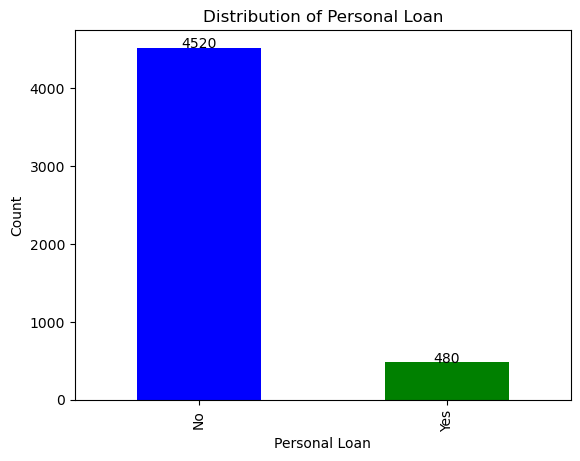

In [122]:
loan_counts = df['Personal Loan'].value_counts()

ax = loan_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Distribution of Personal Loan')

for i, freq in enumerate(loan_counts):
    ax.text(i, freq + 0.1, str(freq), ha='center')

plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

This distribution plot makes it easier to see the class imbalance. There is a big gap between Personal Loan class 0 and class 1. 

### Correlation Plot


Correlation Matrix:


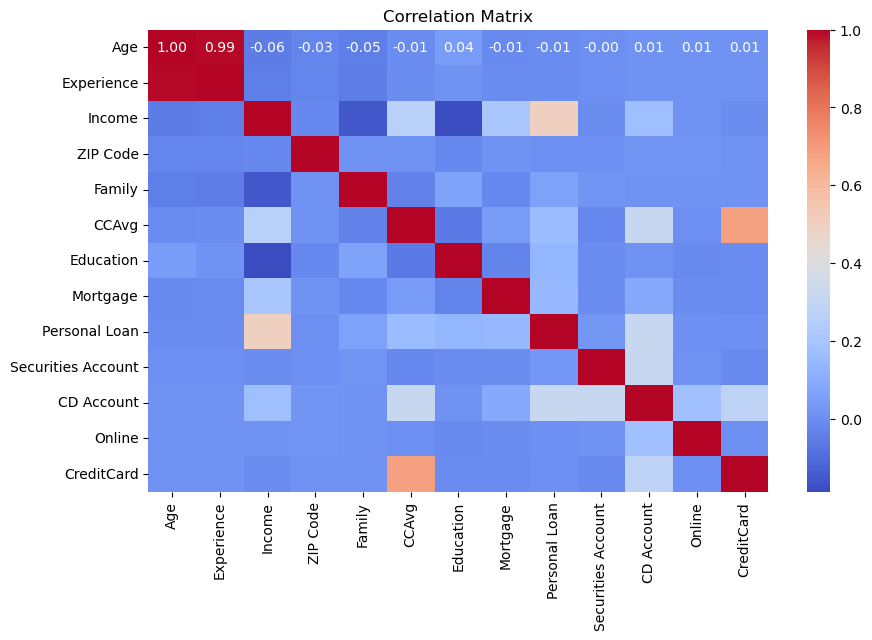

In [123]:
print("\nCorrelation Matrix:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [124]:
corelation = pd.DataFrame({'Correlation' : df.corr()["Personal Loan"].sort_values(ascending=False)[1:]})
print("Correlation of independent variables with output variable:")
display(corelation)

Correlation of independent variables with output variable:


,Correlation
Income,0.502462
CD Account,0.316355
CCAvg,0.158539
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities Account,0.021954
Online,0.006278
CreditCard,0.002802
ZIP Code,0.000107


From the correlation plot above, our target variable shows the highest positive correlation with `Income`, followed by `CD Account`. 

However, both `Age` and `Experience` exhibit a negative correlation with the target variable, indicating that as age increases, individuals are less likely to take out personal loans. The negative correlation between experience and personal loan acceptance may suggest that customers with less experience (those newer to the workforce) are more likely to seek personal loans, possibly due to having fewer savings or financial resources.

### Histograms


Histograms:


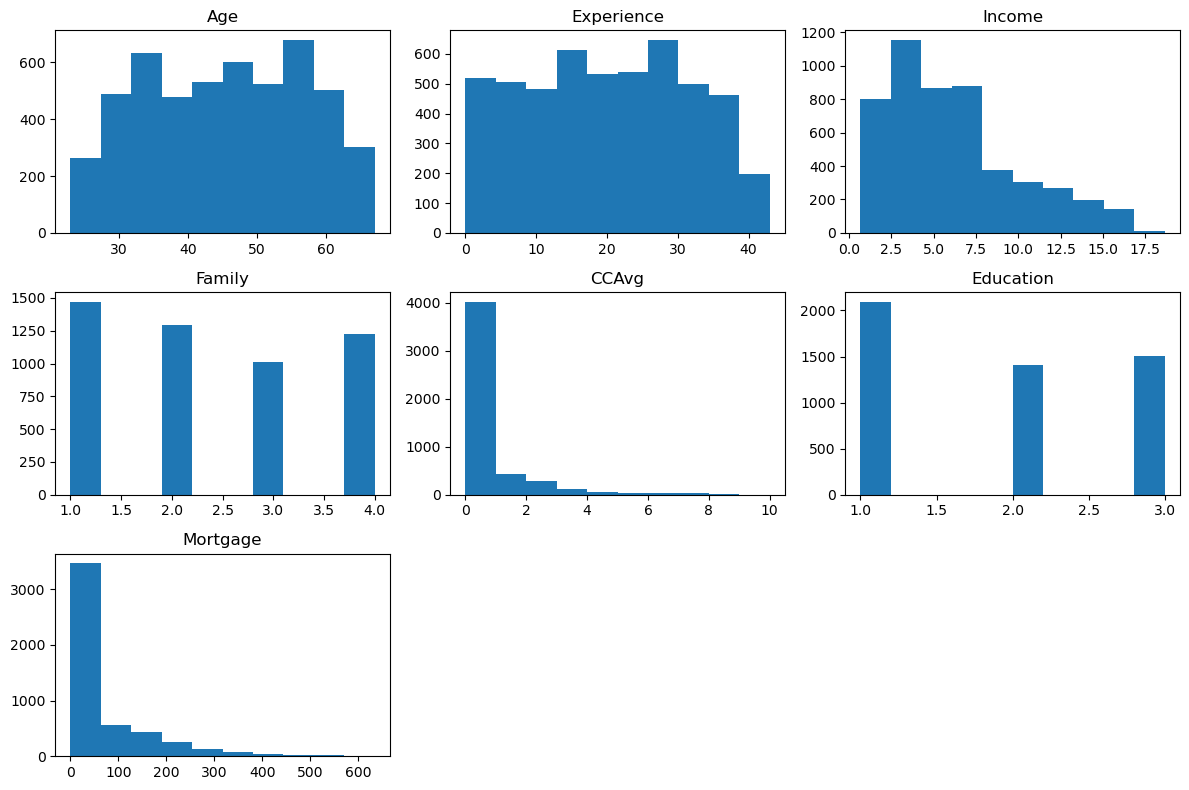

In [125]:
print("\nHistograms:")
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
df[cols].hist(figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

 **Insight from histograms:**

1. Age: The distribution shows a higher concentration of individuals in the 30-50 year age group, indicating that these age groups are more likely to seek personal loans.
2. Experience: The distribution appears symmetrical, with a significant concentration of individuals having 15-30 years of experience.
3. Income: The income distribution is positively skewed, with most values clustered at the lower end and a few higher income values extending to the right.
4. Family: The distribution shows a normal shape, with the majority of customers having one family member.
5. CCAvg: The distribution exhibits a strong positive skew, indicating that most customers have low credit card spending, while a few have significantly higher spending.
6. Education: The education distribution peaks at the first category, suggesting that most customers are undergraduates.
7. Mortgage: The distribution also displays a right skew, indicating that the majority of customers do not have a mortgage.

### Age and Experience Scatter Plot


Age and Experience Scatter Plot


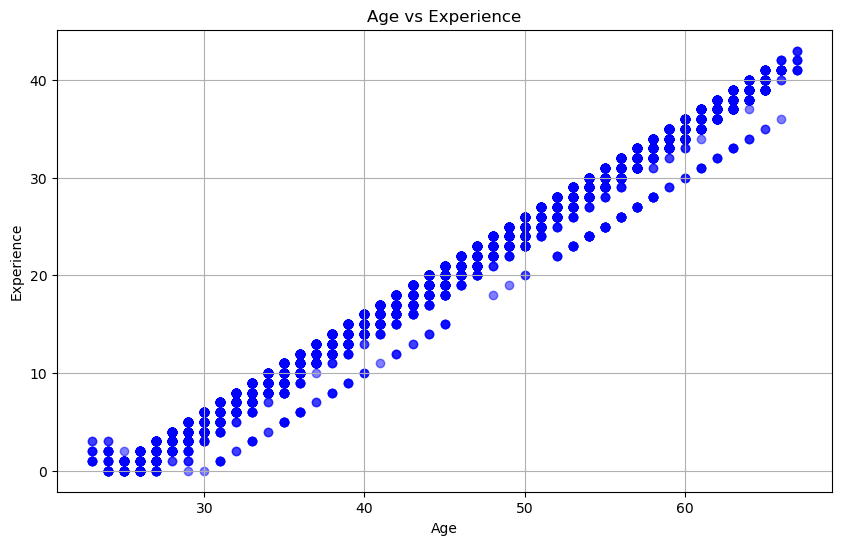

In [126]:
print("\nAge and Experience Scatter Plot")
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Experience'], color='blue', alpha=0.5)
plt.title('Age vs Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.grid(True)
plt.show()

As age increases, experience tends to increase as well, which is an expected pattern in many careers and professions. Individuals generally grow more professional experience as they grow older and progress through their careers. This shows a strong correlation between age and experience. 

### Age group and Personal Loan

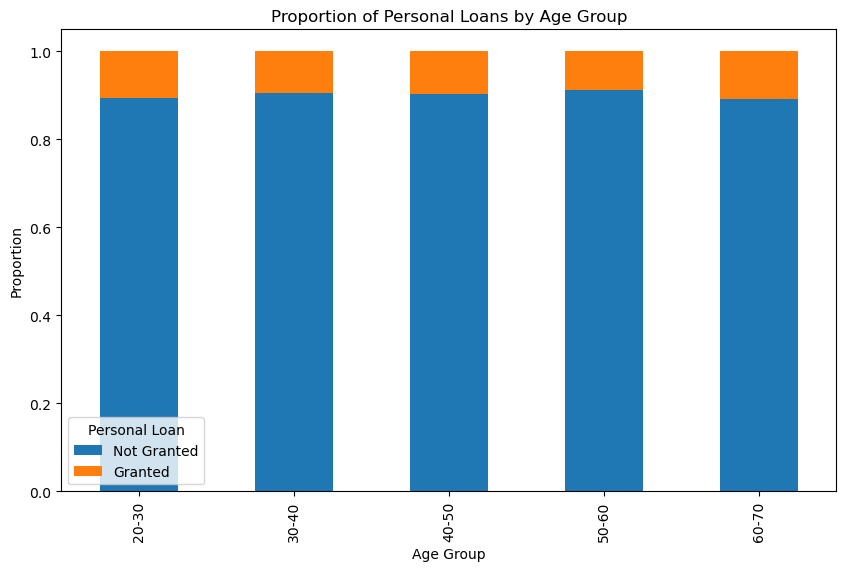

In [127]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
age_group_df = df.copy() 
age_group_df['Age Group'] = pd.cut(age_group_df['Age'], bins=bins, labels=labels)

age_group_analysis = age_group_df.groupby('Age Group')['Personal Loan'].value_counts(normalize=True).unstack()
age_group_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Personal Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Personal Loan', labels=['Not Granted', 'Granted'])
plt.show()

As previously mentioned, class imbalance is a concern in this dataset. The plot indicates that all age groups are predominantly composed of customers who have not been granted a personal loan.

### Personal Loan based on Family Size and Education

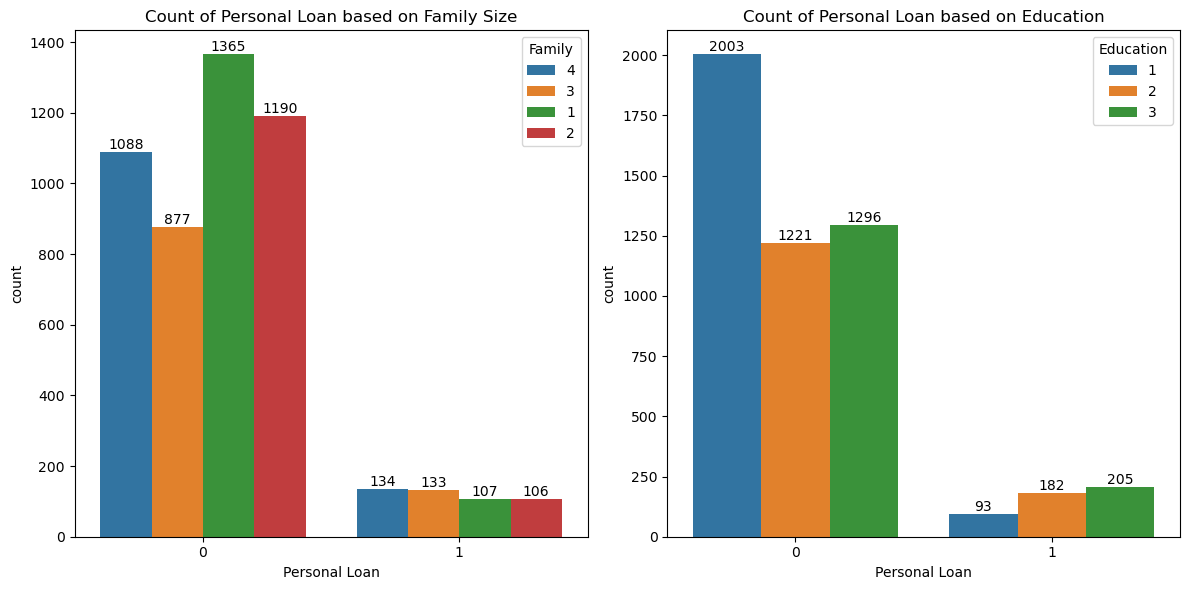

In [128]:
df2 = df.copy()
df2['Family'] = df2['Family'].astype('str')
df2['Education'] = df2['Education'].astype('str')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df2, x='Personal Loan', hue='Family', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_title('Count of Personal Loan based on Family Size')

sns.countplot(data=df2, x='Personal Loan', hue='Education', ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title('Count of Personal Loan based on Education')

plt.tight_layout()
plt.show()

- Based on the family size, customers that are not granted personal loan are customers with one family member, and customers with 3-4 family members are most likely to be granted with personal loan.
- Looking on the education level, it is quite obvious that customers with the lowest education level are not granted for personal loan. While customers with the highest education level are granted with personal loan.

However, in both family size and education, there are more customers that are not granted with personal loan.

### Income Mean based on Family Size

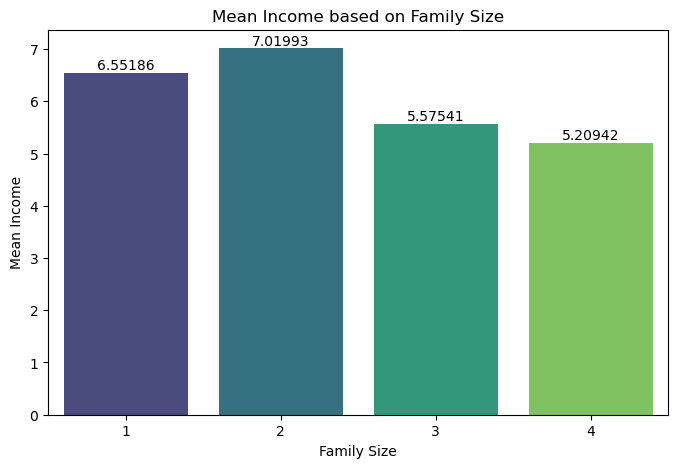

In [129]:
mean_income_family = df.groupby('Family')['Income'].mean().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=mean_income_family, x='Family', y='Income', palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Family Size')
plt.ylabel('Mean Income')
plt.title(f'Mean Income based on Family Size')
plt.show()

According to the barplot above, customers with a family size of 2 had the highest average monthly Income of 7.02, followed by customers with 1 family member.

### ZIP Code

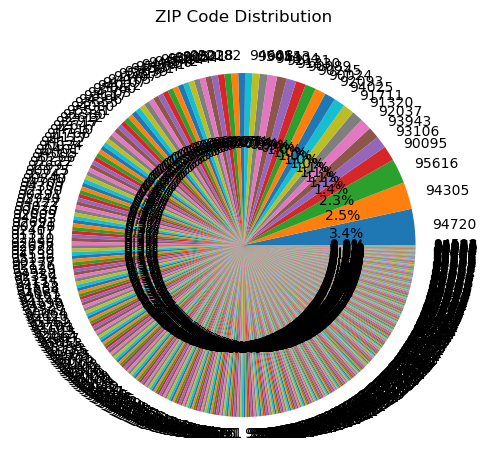

In [130]:
ZIPCode_counts = df['ZIP Code'].value_counts()

plt.figure(figsize=(5, 5)) 
plt.pie(ZIPCode_counts.values, labels=ZIPCode_counts.index, autopct='%1.1f%%')
plt.title('ZIP Code Distribution')

plt.tight_layout()
plt.show()

In [131]:
print("Unique values in ZIP Code:", df['ZIP Code'].nunique())

Unique values in ZIP Code: 467


ZIP Code has high cardinality so I will drop it. 

In [132]:
df.drop(columns=['ZIP Code'], inplace=True)

### Outliers

In [133]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

def count_outliers_iqr(df):
    outliers_count = {}
    for col in df[cols]:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(df)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in df[cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Percentage of outliers in each column:
Age : 0.00%
Experience : 0.00%
Income : 1.92%
Family : 0.00%
CCAvg : 18.24%
Mortgage : 5.82%


Outliers are found in `Income`, `CCAvg`, and `Mortgage`. This information is important when selecting an appropriate scaling technique.

# **Split Data**

Based on the exam's conditions, the dataset will be split into 80% for training, 10% for testing, and 10% for validation.

In [134]:
df_input = df.drop('Personal Loan', axis = 1)
df_target = df[['Personal Loan']]

In [135]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(df_input, df_target, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1111, random_state=42)

In [136]:
print("Data Training :", len(x_train))
print("Data Validation :", len(x_val))
print("Data Testing :", len(x_test))

Data Training : 4000
Data Validation : 500
Data Testing : 500


In [137]:
print("Shape of training set:", x_train.shape)
x_train.head()

Shape of training set: (4000, 11)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2619,33,8,5.166667,3,2.3,1,98,0,0,0,1
4918,50,25,3.500000,2,0.7,2,110,0,0,0,1
1678,56,30,6.083333,2,0.0,1,0,0,0,0,0
3221,40,16,3.666667,1,0.0,1,0,1,0,1,0
1291,58,34,3.666667,4,0.0,1,0,1,0,0,0


In [138]:
print("Shape of testing set:", x_test.shape)
x_test.head()

Shape of testing set: (500, 11)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1501,30,4,2.916667,2,0.3,2,0,1,0,0,1
2586,47,23,12.416667,4,6.1,1,0,0,0,0,1
2653,30,5,10.083333,2,0.0,1,408,0,0,1,0
1055,31,6,5.166667,1,0.0,1,0,1,0,1,0
705,62,36,2.500000,3,0.0,2,0,0,0,1,0


In [139]:
print("Shape of validation set:", x_val.shape)
x_val.head()

Shape of validation set: (500, 11)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3536,50,24,9.333333,1,0.0,1,229,0,0,0,0
1863,48,22,3.583333,1,0.0,2,112,0,0,1,0
4710,41,17,5.916667,3,0.3,3,0,0,0,0,1
3796,24,2,4.166667,3,0.0,2,0,1,0,0,0
2011,46,21,3.250000,4,0.0,2,0,0,0,1,0


#### **Checking for outliers in training set**

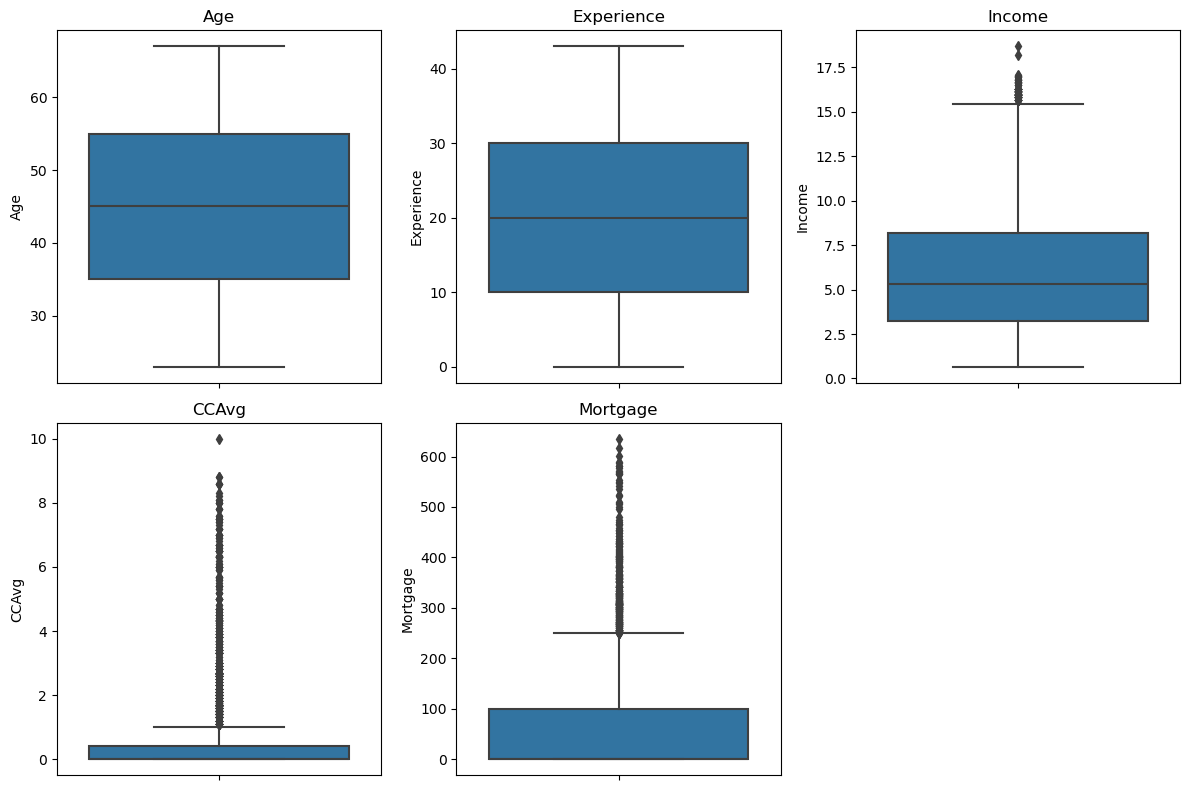

Percentage of outliers in each column:
Age : 0.00%
Experience : 0.00%
Income : 1.58%
CCAvg : 14.40%
Mortgage : 4.98%


In [140]:
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=x_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def count_outliers_iqr(df):
    outliers_count = {}
    for col in x_train[numerical_cols]:
        q1 = x_train[col].quantile(0.25)
        q3 = x_train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_count[col] = x_train[(x_train[col] < lower_bound) | (x_train[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(x_train)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in x_train[numerical_cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

There are outliers found in `Income`, `CCAvg` and `Mortgage`. This information can lead to the choice of scaler used in the scaling process.

# c. Identify challenges

**Exam question:**

Identifikasikan tantangan dan kesulitan dari data tabular yang diberikan.
Hal ini terkait dengan Kualitas Data (Data Kotor dan Hilang, Outliers), Jenis Data (Heterogenitas
Fitur, Encoding Fitur Kategorikal, Skala dan Normalisasi) dan Ketidakseimbangan Kelas (Class
Imbalance).

#### **Data Quality**
As identified during the preprocessing process, the dataset has several quality issues:
- **Negative values** in the `Experience` column, which were corrected since experience cannot be negative.
- **Incorrect data types** in the `CCAvg` column, which needed conversion to a numeric format.
- **Incorrect values** for `Income`, which had to be adjusted from annual to monthly income.

Although no missing values were found in the dataset, a significant number of **outliers** were identified in the `Income`, `CCAvg`, and `Mortgage` columns, which could impact the model's performance.

#### **Data Type**
Our dataset consists entirely of numeric data types, meaning there is no heterogeneity in the data, and no encoding is necessary. 

However, based on the `df.describe()` output, the variables have varying ranges and measuring scales. For example, `Age` has a range of 44, while `Mortgage` has a range of 635. This difference in scales could cause bias during the modeling process, making it necessary to perform scaling.

For columns with outliers (`Income`, `CCAvg`, and `Mortgage`), I will apply **Robust Scaler**, as it handles outliers more effectively by focusing on the interquartile range. For other columns such as `Age` and `Experience`, I will use **Standard Scaler** to standardize the data.

Columns that are binary or categorical, such as `Education`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, and `CreditCard`, will not be included in the scaling process since scaling is unnecessary for these types of variables.

### **Scaling**

Columns with outliers will be scaled using Robust Scaler, as it is effective at handling outliers by focusing on the interquartile range. The remaining columns will be scaled using Standard Scaler to ensure consistency across features without outliers. This approach helps in preventing the model from being biased by variables with different ranges.

In [141]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [142]:
robust_scaler = RobustScaler()
robust_scaler.fit(x_train[['Income', 'CCAvg', 'Mortgage']])

x_train[['Income', 'CCAvg', 'Mortgage']] = robust_scaler.transform(x_train[['Income', 'CCAvg', 'Mortgage']])
x_val[['Income', 'CCAvg', 'Mortgage']] = robust_scaler.transform(x_val[['Income', 'CCAvg', 'Mortgage']])
x_test[['Income', 'CCAvg', 'Mortgage']] = robust_scaler.transform(x_test[['Income', 'CCAvg', 'Mortgage']])

In [143]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train[['Age', 'Experience']])

x_train[['Age', 'Experience']] = standard_scaler.transform(x_train[['Age', 'Experience']])
x_val[['Age', 'Experience']] = standard_scaler.transform(x_val[['Age', 'Experience']])
x_test[['Age', 'Experience']] = standard_scaler.transform(x_test[['Age', 'Experience']])

### **Handling Class Imbalance**

In [144]:
print(df['Personal Loan'].value_counts())
print()

personal_loan_0 = (df['Personal Loan']==0).sum()
personal_loan_1 = (df['Personal Loan']==1).sum()
len_data = df.shape[0]

print("Percentage of Personal Loan")
print("Personal Loan 0 :", f"{(personal_loan_0/len_data)*100}%")
print("Personal Loan 1 :", f"{(personal_loan_1/len_data)*100}%")

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Percentage of Personal Loan
Personal Loan 0 : 90.4%
Personal Loan 1 : 9.6%


In our target variable, `Personal Loan`, we observe a clear class imbalance, where the majority of customers are not granted a personal loan. This imbalance can lead to bias in our model's predictions.

Specifically, **90.4%** of the data represents customers who are not granted a personal loan (the **majority class**), while the remaining customers are those who are granted a personal loan (the **minority class**). As a result, the model might be inclined to predict all instances as "0" (no loan granted), which could lead to misleading conclusions about the model's effectiveness.

To address this imbalance, I will apply **OverSampling** using **SMOTE** (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic data for the minority class, helping balance the training data. Importantly, **oversampling will be applied only to the training and validation sets**, allowing the model to learn from a balanced dataset. The testing set will remain unchanged to ensure the integrity and objectivity of the model's evaluation.

**Reference**: [5 Techniques to Handle Imbalanced Data for Classification Problems](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)

In [145]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
x_val_resampled, y_val_resampled = sm.fit_resample(x_val, y_val)

In [146]:
print("Shape of training set before oversampling :", x_train.shape, y_train.shape)
print("Shape of training set after oversampling :", x_train_resampled.shape, y_train_resampled.shape)

Shape of training set before oversampling : (4000, 11) (4000, 1)
Shape of training set after oversampling : (7232, 11) (7232, 1)


In [147]:
print("Shape of validation set before oversampling :", x_val.shape, y_val.shape)
print("Shape of validation set after oversampling :", x_val_resampled.shape, y_val_resampled.shape)

Shape of validation set before oversampling : (500, 11) (500, 1)
Shape of validation set after oversampling : (916, 11) (916, 1)


The shape of training and validation set have been resampled. Training set becomes 7232, showing that there are 3232 new synthetic data for training set. For validation set, there are 416 new synthetic data. 

# **d. Baseline Architecture**

**Exam question:**

Buatlah arsitektur baseline dengan n nodes input layer, 2 buah hidden layer dengan banyak 2 × n nodes awal dan layer akhir banyak kelas nya (n, 2 × n, 2 × n, num_class). Keterangan: n adalah banyak input dan num_class adalah banyak kelas. Activation function 
untuk tiap hidden layer menggunakan ReLU


- n nodes input layer
- 2 hidden layer, dengan 2 x n nodes awal
- layer akhir banyak kelasnya (2 kelas)

n, 2 x n, 2 x n, num_class

activation function : ReLU

In [148]:
import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras.utils import to_categorical

In [149]:
n_input = x_train_resampled.shape[1] #11 -> number of features
n_hidden = (2 * n_input) # 2x11 = 22
num_class = 2

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(n_input,)))

model.add(keras.layers.Dense(n_hidden, activation = 'relu'))
model.add(keras.layers.Dense(n_hidden, activation = 'relu'))
model.add(keras.layers.Dense(num_class, activation = 'sigmoid')) # use sigmoid activation for output layer because it's a binary problem 

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 22)                  │             506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              46 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 816 (3.19 KB)

 Trainable params: 816 (3.19 KB)

 Non-trainable params: 0 (0.00 B)

None


# e. Architecture Modification

**Exam question:**

Setelah mengetahui hasil dari nomor (1d), modifikasi arsitektur 
tersebu tuntuk mendapatkan nilai akurasi optimal yang kalian dapatkan (kalian dapa 
menambahkan atau mengurangi arsitektur tersebut, atau mengganti hyperparameter, at u
menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk mengguna an
pendekatan yang kalian pilih terkait dengan tanta dan dan kesulitan yang dihadapi daam 
data tabular tersebut. (1c)

For the architecture modification, I will try to add **dropout layers** in between hidden layers and output layer. I also changed the neurons in hidden layer to `n_hidden * 2`.

In [150]:
n_input = x_train_resampled.shape[1] #11
n_hidden = (2 * n_input) # 2x11 = 22
num_class = 2

model2 = keras.models.Sequential()
model2.add(tf.keras.Input(shape=(n_input,)))

model2.add(keras.layers.Dense(n_hidden*2, activation = 'relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(n_hidden*2, activation = 'relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(num_class, activation = 'sigmoid'))

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 44)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 44)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 44)                  │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 44)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,598 (10.15 KB)

 Trainable params: 2,598 (10.15 KB)

 Non-trainable params: 0 (0.00 B)

None


## Fit Model

In [151]:
y_train_resampled = to_categorical(y_train_resampled)
y_val_resampled = to_categorical(y_val_resampled)

### Model 1

In [152]:
model.fit(x_train_resampled, y_train_resampled, epochs = 10, validation_data=(x_val_resampled, y_val_resampled))

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6065 - loss: 0.6980 - val_accuracy: 0.7544 - val_loss: 0.6111
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7874 - loss: 0.5944 - val_accuracy: 0.8679 - val_loss: 0.5293
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8534 - loss: 0.5019 - val_accuracy: 0.8821 - val_loss: 0.4195
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8826 - loss: 0.3916 - val_accuracy: 0.8843 - val_loss: 0.3492
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8835 - loss: 0.3413 - val_accuracy: 0.8886 - val_loss: 0.3117
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8902 - loss: 0.2980 - val_accuracy: 0.8886 - val_loss: 0.2904
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8888 - loss: 0.2874 - val_accuracy: 0.8930 - val_loss: 0.2808
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8934 - loss: 0.2660 - val_accuracy: 0.

### Model 2 (Modificated Architecture)

In [153]:
model2.fit(x_train_resampled, y_train_resampled, epochs = 15, validation_data=(x_val_resampled, y_val_resampled))

Epoch 1/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7155 - loss: 0.5836 - val_accuracy: 0.8821 - val_loss: 0.3119
Epoch 2/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8762 - loss: 0.2943 - val_accuracy: 0.8886 - val_loss: 0.2603
Epoch 3/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8999 - loss: 0.2356 - val_accuracy: 0.9083 - val_loss: 0.2247
Epoch 4/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9202 - loss: 0.1962 - val_accuracy: 0.9236 - val_loss: 0.2083
Epoch 5/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9266 - loss: 0.1774 - val_accuracy: 0.9225 - val_loss: 0.1968
Epoch 6/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9367 - loss: 0.1581 - val_accuracy: 0.9345 - val_loss: 0.1909
Epoch 7/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9332 - loss: 0.1611 - val_accuracy: 0.9345 - val_loss: 0.1943
Epoch 8/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9446 - loss: 0.1456 - val_accuracy: 0.

# f. Model Evaluation

In [154]:
from sklearn.metrics import classification_report

#### Model 1 

In [155]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
print('\nClassification Report for Model 1\n')
print(classification_report(y_test, y_pred, target_names=['0','1']))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report for Model 1

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       446
           1       0.46      0.96      0.62        54

    accuracy                           0.87       500
   macro avg       0.73      0.91      0.77       500
weighted avg       0.94      0.87      0.89       500



### **Classification report insights for Model 1 :**

1) Precision : measures how well the model **avoids false positives**
- **class 0:** has a precision of 99%, indicating that 99% of the instances were predicted as class 0 are actually class 0. The model is reliable identifying class 0.
- **class 1:** much lower than class 0 at 46% showing a significant number of false positives. Only 46% of the instances are predicted as class 1, that are truly class 1. Model shows inaccurate prediction of identifying the minority class.

2) Recall : measures the model's ability to find **true positive** instances
- **class 0:** model successfully identified 86% of actual class 0 instances.
- **class 1:** has a higher recall of 96%, meaning that the model successfully captures 94% of the actual class 1 instances.

3) F1-score : a score representing the balance between the precision and recall
- **class 0:** shows an f1-score of 92% showing a good balance between precision and recall performance.
- **class 1:** shows an f1-score of 62%, which is lower than class 0, showing that we can improve the precision or recall to achieve higher f1-score for class 1.

Overall, the model achieve 87% accuracy suggesting that majority of the predictions were correct. However, the data experienced class imbalanced, we cannot depend on the accuracy alone and can be misleading. 

#### Model 2

In [156]:
y_pred2 = model2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=-1)
print('\nClassification Report for Model 2\n')
print(classification_report(y_test, y_pred2, target_names=['0','1']))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Classification Report for Model 2

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       446
           1       0.87      0.96      0.91        54

    accuracy                           0.98       500
   macro avg       0.93      0.97      0.95       500
weighted avg       0.98      0.98      0.98       500



### **Classification report insights for Model 2:**

1) Precision : measures how well the model **avoids false positives**
- **class 0:** has a perfect precision score of 100%, meaning that all instances are predicted as true positives and our model shows no predicted false positives.
- **class 1:** shows a lower precision than class 0 of 84%, but a significantly higher precision than Model 1. Indicating that there are still false positives found in this class. 

2) Recall : measures the model's ability to find **true positive** instances
- **class 0:** has a recall of 98%, indicating that our model successfully captures almost all instances of the majority class.
- **class 1:** slightly lower than class 0 by 2%, but managed to correctly identifies 96% of actual class 1 instances. 
  
3) F1-score : a score representing the balance between the precision and recall
- **class 0:** shows an f1-score of 99% showing an almost perfect combined precision and recall performance, and much better performance than Model 1.
- **class 1:** shows an f1-score of 91%, which is slightly lower than class 0, but is a very much improved performance than Model 1. 

After implementing modifications to the model, there is a notable improvement in performance, achieving in an accuracy of 98%. The model has also achieved great precision and recall for the minority class.

In summary, when comparing Model 1 and Model 2, it is visible that Model 2 outperforms Model 1 in predicting Bank Personal Loans, demonstrating better reliability and effectiveness, especially for the minority class.